In [ ]:
#| default_exp AOD_data

In [ ]:
#| export
import pandas as pd
from datetime import datetime
from dateutil import tz
import nbdev

# Objective 

This notebook will be used to merge the data of AOD from the satelite images with the PM 2.5 data from the stations. 

## Explore and Cleaning test 

In [ ]:
#All AOD data fron a single month 
AOD_month= pd.read_csv('../data_s/red_estaciones_todos_2018.csv')
AOD_month.head()

,id,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp
0,AJU,NaN,NaN,18,2018-01-01T18:10:00
1,AJM,NaN,NaN,18,2018-01-01T18:10:00
2,DIC,NaN,NaN,18,2018-01-01T18:10:00
3,EAJ,NaN,NaN,18,2018-01-01T18:10:00
4,CCA,NaN,NaN,18,2018-01-01T18:10:00


In [ ]:
AOD_month= AOD_month[ AOD_month['Optical_Depth_047'].isna()== False]
AOD_month.reset_index(drop=True, inplace=True)
AOD_month.head()

,id,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp
0,DIC,939.0,197.0,19,2018-01-01T19:40:00
1,CCA,1171.0,239.0,19,2018-01-01T19:40:00
2,UAX,920.0,238.0,19,2018-01-01T19:40:00
3,UIZ,680.0,454.0,19,2018-01-01T19:40:00
4,MPA,970.0,194.0,19,2018-01-01T19:40:00


In [ ]:
AOD_month['Estacion']= AOD_month['id']
AOD_month.drop(columns='id', inplace=True)
AOD_month.head()

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion
0,939.0,197.0,19,2018-01-01T19:40:00,DIC
1,1171.0,239.0,19,2018-01-01T19:40:00,CCA
2,920.0,238.0,19,2018-01-01T19:40:00,UAX
3,680.0,454.0,19,2018-01-01T19:40:00,UIZ
4,970.0,194.0,19,2018-01-01T19:40:00,MPA


In [ ]:
AOD_month.shape

(4042, 5)

## Get the data from the PM2.5 stations 



In [ ]:
pm2_5_estaciones =  pd.read_csv('../data_s/PM2.5/PM2_5_2004-2021.csv', sep =';')

In [ ]:
pm2_5_estaciones.drop(columns='Unnamed: 0',  inplace = True)
pm2_5_estaciones.head()

,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD
0,ACO_ZMVM,2004-01-01,1,pm2.5,NaN,µg/m<sup>3</sup>
1,ACO_ZMVM,2004-01-01,2,pm2.5,NaN,µg/m<sup>3</sup>
2,ACO_ZMVM,2004-01-01,3,pm2.5,NaN,µg/m<sup>3</sup>
3,ACO_ZMVM,2004-01-01,4,pm2.5,NaN,µg/m<sup>3</sup>
4,ACO_ZMVM,2004-01-01,5,pm2.5,NaN,µg/m<sup>3</sup>


In [ ]:

pm2_5_estaciones= pm2_5_estaciones[pm2_5_estaciones['VALOR'].isna() ==False]
pm2_5_estaciones.head()

,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD
26304,ACO_ZMVM,2007-06-01,1,pm2.5,17.0,µg/m<sup>3</sup>
26305,ACO_ZMVM,2007-06-01,2,pm2.5,11.0,µg/m<sup>3</sup>
26306,ACO_ZMVM,2007-06-01,3,pm2.5,16.0,µg/m<sup>3</sup>
26307,ACO_ZMVM,2007-06-01,4,pm2.5,23.0,µg/m<sup>3</sup>
26308,ACO_ZMVM,2007-06-01,5,pm2.5,26.0,µg/m<sup>3</sup>


In [ ]:
pm2_5_estaciones.FECHA= pd.to_datetime(pm2_5_estaciones.FECHA)

In [ ]:
pm2_5_estaciones_2018=  pm2_5_estaciones[(pm2_5_estaciones.FECHA > pd.to_datetime('2018-01-01')) & (pm2_5_estaciones.FECHA < pd.to_datetime('2019-01-01'))]

In [ ]:
pm2_5_estaciones_2018


,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD
270714,AJM_ZMVM,2018-01-05,10,pm2.5,1.0,µg/m<sup>3</sup>
270715,AJM_ZMVM,2018-01-05,11,pm2.5,1.0,µg/m<sup>3</sup>
270716,AJM_ZMVM,2018-01-05,12,pm2.5,1.0,µg/m<sup>3</sup>
270873,AJM_ZMVM,2018-01-12,1,pm2.5,1.0,µg/m<sup>3</sup>
270874,AJM_ZMVM,2018-01-12,2,pm2.5,1.0,µg/m<sup>3</sup>
...,...,...,...,...,...,...
5334304,XAL_ZMVM,2018-12-13,15,pm2.5,1.0,µg/m<sup>3</sup>
5334305,XAL_ZMVM,2018-12-13,16,pm2.5,1.0,µg/m<sup>3</sup>
5334471,XAL_ZMVM,2018-12-20,14,pm2.5,1.0,µg/m<sup>3</sup>
5334472,XAL_ZMVM,2018-12-20,15,pm2.5,1.0,µg/m<sup>3</sup>


Tomemos solo las de la zona metropolitana 

In [ ]:
pm2_5_estaciones_2018= pm2_5_estaciones_2018[pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: 'ZMVM' in l)]

In [ ]:
pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: l.split('_')[0] ).unique()

array(['AJM', 'AJU', 'BJU', 'CAM', 'CCA', 'GAM', 'HGM', 'INN', 'MER',
       'MGH', 'NEZ', 'SAG', 'SFE', 'TLA', 'UAX', 'UIZ', 'XAL'],
      dtype=object)

In [ ]:
esta_rep = pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: l.split('_')[0] ).unique()
AOD_est = AOD_month.Estacion.unique()
for est in esta_rep:
    if not (est in AOD_est):
        print('La siguiente estacion no esta: ', est)

La siguiente estacion no esta:  SFE


In [ ]:
esta_rep = pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: l.split('_')[0] ).unique()
AOD_est = AOD_month.Estacion.unique()
NO_PM5= []
for est in AOD_est:
    if not (est in esta_rep):
        print('La siguiente estacion no esta: ', est)
        NO_PM5.append(est)

La siguiente estacion no esta:  DIC
La siguiente estacion no esta:  MPA
La siguiente estacion no esta:  MCM
La siguiente estacion no esta:  IBM
La siguiente estacion no esta:  LOM
La siguiente estacion no esta:  PED
La siguiente estacion no esta:  CUA
La siguiente estacion no esta:  CHO
La siguiente estacion no esta:  MON
La siguiente estacion no esta:  TLI
La siguiente estacion no esta:  FAR
La siguiente estacion no esta:  FAC
La siguiente estacion no esta:  ATI
La siguiente estacion no esta:  IZT
La siguiente estacion no esta:  COR
La siguiente estacion no esta:  TAH
La siguiente estacion no esta:  LLA
La siguiente estacion no esta:  VIF
La siguiente estacion no esta:  ACO
La siguiente estacion no esta:  EAJ
La siguiente estacion no esta:  LAA
La siguiente estacion no esta:  EDL
La siguiente estacion no esta:  TEC
La siguiente estacion no esta:  CUT
La siguiente estacion no esta:  LPR



Vamos a utilizar solo las estaciones que tengan PM 25 en las tablas y que se encuentren en las que se tienen los valores de AOD 

In [ ]:
pm2_5_estaciones_2018

,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD
270714,AJM_ZMVM,2018-01-05,10,pm2.5,1.0,µg/m<sup>3</sup>
270715,AJM_ZMVM,2018-01-05,11,pm2.5,1.0,µg/m<sup>3</sup>
270716,AJM_ZMVM,2018-01-05,12,pm2.5,1.0,µg/m<sup>3</sup>
270873,AJM_ZMVM,2018-01-12,1,pm2.5,1.0,µg/m<sup>3</sup>
270874,AJM_ZMVM,2018-01-12,2,pm2.5,1.0,µg/m<sup>3</sup>
...,...,...,...,...,...,...
5334304,XAL_ZMVM,2018-12-13,15,pm2.5,1.0,µg/m<sup>3</sup>
5334305,XAL_ZMVM,2018-12-13,16,pm2.5,1.0,µg/m<sup>3</sup>
5334471,XAL_ZMVM,2018-12-20,14,pm2.5,1.0,µg/m<sup>3</sup>
5334472,XAL_ZMVM,2018-12-20,15,pm2.5,1.0,µg/m<sup>3</sup>


In [ ]:
pm2_5_estaciones_2018['Estacion']= pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: l.split('_')[0])

/tmp/ipykernel_2005937/3700421851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_5_estaciones_2018['Estacion']= pm2_5_estaciones_2018['CVE_EST'].apply(lambda l: l.split('_')[0])


In [ ]:
from_zone = tz.gettz('UTC')
to_zone = tz.gettz()


In [ ]:
AOD_month['TIME_STAMP'] = pd.to_datetime(AOD_month['timestamp'])

In [ ]:
AOD_month

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP
0,939.0,197.0,19,2018-01-01T19:40:00,DIC,2018-01-01 19:40:00
1,1171.0,239.0,19,2018-01-01T19:40:00,CCA,2018-01-01 19:40:00
2,920.0,238.0,19,2018-01-01T19:40:00,UAX,2018-01-01 19:40:00
3,680.0,454.0,19,2018-01-01T19:40:00,UIZ,2018-01-01 19:40:00
4,970.0,194.0,19,2018-01-01T19:40:00,MPA,2018-01-01 19:40:00
...,...,...,...,...,...,...
4037,312.0,558.0,20,2018-12-31T20:05:00,IBM,2018-12-31 20:05:00
4038,302.0,763.0,20,2018-12-31T20:05:00,MER,2018-12-31 20:05:00
4039,370.0,762.0,20,2018-12-31T20:05:00,ACO,2018-12-31 20:05:00
4040,391.0,826.0,20,2018-12-31T20:05:00,FAR,2018-12-31 20:05:00


In [ ]:
AOD_month['Mexico_city_time']= AOD_month['TIME_STAMP'].dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
#tz_localize('utc').tz_convert('America/Mexico_City')
AOD_month['Mexico_city_hour'] = AOD_month['Mexico_city_time'].apply(lambda l: l.hour)
AOD_month['Mexico_city_date'] = AOD_month['Mexico_city_time'].apply(lambda l: l.date)

In [ ]:
AOD_month['Mexico_city_date'][0]

datetime.date(2018, 1, 1)

In [ ]:
AOD_month

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Mexico_city_time,Mexico_city_hour,Mexico_city_date
0,939.0,197.0,19,2018-01-01T19:40:00,DIC,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01
1,1171.0,239.0,19,2018-01-01T19:40:00,CCA,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01
2,920.0,238.0,19,2018-01-01T19:40:00,UAX,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01
3,680.0,454.0,19,2018-01-01T19:40:00,UIZ,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01
4,970.0,194.0,19,2018-01-01T19:40:00,MPA,2018-01-01 19:40:00,2018-01-01 13:40:00-06:00,13,2018-01-01
...,...,...,...,...,...,...,...,...,...
4037,312.0,558.0,20,2018-12-31T20:05:00,IBM,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31
4038,302.0,763.0,20,2018-12-31T20:05:00,MER,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31
4039,370.0,762.0,20,2018-12-31T20:05:00,ACO,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31
4040,391.0,826.0,20,2018-12-31T20:05:00,FAR,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31


In [ ]:

pm2_5_estaciones_2018['FECHA_date']= pm2_5_estaciones_2018['FECHA'].apply(lambda l: l.date())

/tmp/ipykernel_2005937/4165706453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_5_estaciones_2018['FECHA_date']= pm2_5_estaciones_2018['FECHA'].apply(lambda l: l.date())


In [ ]:
AOD_PM25_estaciones =  AOD_month.merge(pm2_5_estaciones_2018, how= 'left', right_on = ['Estacion','HORA', 'FECHA_date' ], left_on=['Estacion','Mexico_city_hour' ,'Mexico_city_date' ])

In [ ]:
AOD_PM25_estaciones.tail()

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Mexico_city_time,Mexico_city_hour,Mexico_city_date,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD,FECHA_date
4037,312.0,558.0,20,2018-12-31T20:05:00,IBM,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4038,302.0,763.0,20,2018-12-31T20:05:00,MER,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,MER_ZMVM,2018-12-31,14.0,pm2.5,14.0,µg/m<sup>3</sup>,2018-12-31
4039,370.0,762.0,20,2018-12-31T20:05:00,ACO,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4040,391.0,826.0,20,2018-12-31T20:05:00,FAR,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4041,363.0,855.0,20,2018-12-31T20:05:00,LPR,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
AOD_PM25_estaciones_sel=  AOD_PM25_estaciones[AOD_PM25_estaciones['VALOR'].isna()==False]

In [ ]:
AOD_PM25_estaciones_sel

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Mexico_city_time,Mexico_city_hour,Mexico_city_date,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD,FECHA_date
38,419.0,131.0,18,2018-01-03T18:00:00,NEZ,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,NEZ_ZMVM,2018-01-03,12.0,pm2.5,57.0,µg/m<sup>3</sup>,2018-01-03
40,442.0,180.0,18,2018-01-03T18:00:00,SAG,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,SAG_ZMVM,2018-01-03,12.0,pm2.5,39.0,µg/m<sup>3</sup>,2018-01-03
49,647.0,222.0,19,2018-01-03T19:25:00,NEZ,2018-01-03 19:25:00,2018-01-03 13:25:00-06:00,13,2018-01-03,NEZ_ZMVM,2018-01-03,13.0,pm2.5,29.0,µg/m<sup>3</sup>,2018-01-03
56,674.0,1181.0,20,2018-01-04T20:10:00,NEZ,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,NEZ_ZMVM,2018-01-04,14.0,pm2.5,33.0,µg/m<sup>3</sup>,2018-01-04
58,538.0,2060.0,20,2018-01-04T20:10:00,SAG,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,SAG_ZMVM,2018-01-04,14.0,pm2.5,41.0,µg/m<sup>3</sup>,2018-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,116.0,112.0,20,2018-12-30T20:55:00,MER,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,MER_ZMVM,2018-12-30,14.0,pm2.5,2.0,µg/m<sup>3</sup>,2018-12-30
4021,139.0,197.0,20,2018-12-30T20:55:00,SAG,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,SAG_ZMVM,2018-12-30,14.0,pm2.5,12.0,µg/m<sup>3</sup>,2018-12-30
4024,190.0,161.0,20,2018-12-30T20:55:00,TLA,2018-12-30 20:55:00,2018-12-30 14:55:00-06:00,14,2018-12-30,TLA_ZMVM,2018-12-30,14.0,pm2.5,10.0,µg/m<sup>3</sup>,2018-12-30
4031,302.0,763.0,20,2018-12-31T20:05:00,MER,2018-12-31 20:05:00,2018-12-31 14:05:00-06:00,14,2018-12-31,MER_ZMVM,2018-12-31,14.0,pm2.5,14.0,µg/m<sup>3</sup>,2018-12-31


## Put all in a function

In [ ]:
#| export 
def load_AOD_data(path, local_time = 'America/Mexico_City'):
    """ Loading  and cleaning the data from the AOD. 
    The AOD is on UTC, if not please make a new version of this function  
    """
    AOD_time  = pd.read_csv(path)
    AOD_time = AOD_time[ AOD_time['Optical_Depth_047'].isna()== False]
    AOD_time['Estacion']= AOD_time['id']
    AOD_time.drop(columns='id', inplace=True)
    
    AOD_time['TIME_STAMP'] = pd.to_datetime(AOD_time['timestamp']) ### 
    ### Change time zone 
    print('Converting to local time: ', local_time)
    if local_time!= None:
        
        AOD_time['Local_time']= AOD_time['TIME_STAMP'].dt.tz_localize('UTC').dt.tz_convert(local_time)
    #tz_localize('utc').tz_convert('America/Mexico_City')
    
    else: 
        AOD_time['Local_time']= AOD_time['TIME_STAMP']
        
    AOD_time['Local_time'+'_hour'] = AOD_time['Local_time'].apply(lambda l: l.hour)
    AOD_time['Local_time'+'_date'] = AOD_time['Local_time'].apply(lambda l: l.date)
    
    return AOD_time


In [ ]:
#| export 
def load_PM25(path, initial_interval, end_interval, zona_metropoli = 'ZMVM'):
    """Loading and cleaning the data from the PM 25 
    """
    pm2_5_esta =  pd.read_csv(path, sep =';')## Load
    pm2_5_esta.drop(columns='Unnamed: 0',  inplace = True) #drop 
    pm2_5_esta= pm2_5_esta[pm2_5_esta['VALOR'].isna() ==False] #drop NaN values 
    pm2_5_esta.FECHA= pd.to_datetime(pm2_5_esta.FECHA) #to datetime
    pm2_5_esta_interval=  pm2_5_esta[(pm2_5_esta.FECHA > pd.to_datetime(initial_interval)) &
                                     (pm2_5_esta.FECHA < pd.to_datetime(end_interval))] ### get interval 
    pm2_5_esta_interval= pm2_5_esta_interval[pm2_5_esta_interval['CVE_EST'].apply(lambda l: zona_metropoli in l)]
    pm2_5_esta_interval['Estacion'] = pm2_5_esta_interval['CVE_EST'].apply(lambda l: l.split('_')[0])
    pm2_5_esta_interval['FECHA_date']= pm2_5_esta_interval['FECHA'].apply(lambda l: l.date())
    
    
    return pm2_5_esta_interval



In [ ]:
#| export 
def merge_AOD_PM25(df_AOD, df_PM25 ):
    """
    Merge the table from the AOD data and the PM 2.5 from stations 
    """
    AOD_PM25_esta =  df_AOD.merge(df_PM25,
                                  how= 'left',
                                  right_on = ['Estacion','HORA', 'FECHA_date' ],
                                  left_on=['Estacion','Local_time_hour' ,'Local_time_date' ]
                                 )
    AOD_PM25_esta=  AOD_PM25_esta[AOD_PM25_esta['VALOR'].isna()==False]
    
    return AOD_PM25_esta
    

In [ ]:
AOD_dat = load_AOD_data('../data_s/red_estaciones_todos_2018.csv')
PM25_dat = load_PM25('../data_s/PM2.5/PM2_5_2004-2021.csv',
                     initial_interval='2018-01-01',
                     end_interval='2019-01-01')

Converting to local time:  America/Mexico_City


In [ ]:
AOD_PM25_all_2018 = merge_AOD_PM25(AOD_dat, PM25_dat)

In [ ]:
AOD_PM25_all_2018.head()

,Optical_Depth_047,AOD_Uncertainty,hour_day,timestamp,Estacion,TIME_STAMP,Local_time,Local_time_hour,Local_time_date,CVE_EST,FECHA,HORA,PARAMETRO,VALOR,UNIDAD,FECHA_date
38,419.0,131.0,18,2018-01-03T18:00:00,NEZ,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,NEZ_ZMVM,2018-01-03,12.0,pm2.5,57.0,µg/m<sup>3</sup>,2018-01-03
40,442.0,180.0,18,2018-01-03T18:00:00,SAG,2018-01-03 18:00:00,2018-01-03 12:00:00-06:00,12,2018-01-03,SAG_ZMVM,2018-01-03,12.0,pm2.5,39.0,µg/m<sup>3</sup>,2018-01-03
49,647.0,222.0,19,2018-01-03T19:25:00,NEZ,2018-01-03 19:25:00,2018-01-03 13:25:00-06:00,13,2018-01-03,NEZ_ZMVM,2018-01-03,13.0,pm2.5,29.0,µg/m<sup>3</sup>,2018-01-03
56,674.0,1181.0,20,2018-01-04T20:10:00,NEZ,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,NEZ_ZMVM,2018-01-04,14.0,pm2.5,33.0,µg/m<sup>3</sup>,2018-01-04
58,538.0,2060.0,20,2018-01-04T20:10:00,SAG,2018-01-04 20:10:00,2018-01-04 14:10:00-06:00,14,2018-01-04,SAG_ZMVM,2018-01-04,14.0,pm2.5,41.0,µg/m<sup>3</sup>,2018-01-04


In [ ]:
AOD_PM25_all_2018.shape

(472, 16)

## Simple linear regresion 

In [ ]:
from sklearn import  linear_model
import matplotlib.pyplot as plt

In [ ]:
X= AOD_PM25_all_2018['Optical_Depth_047'].values
Y= AOD_PM25_all_2018['VALOR'].values

In [ ]:
Y = Y.reshape(Y.shape[0], 1)
X = X.reshape(X.shape[0], 1)

([], [])

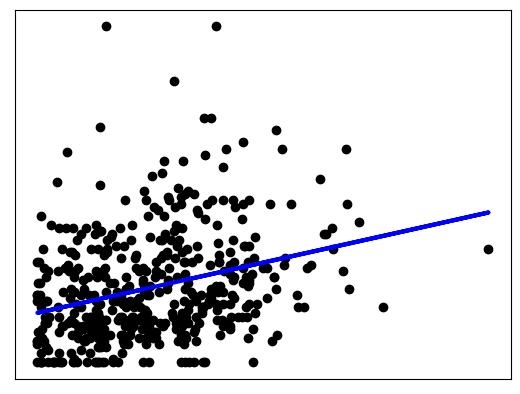

In [ ]:

regr = linear_model.LinearRegression()
regr.fit(X, Y)
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())


In [ ]:
export_to = '../src/tmp'



In [ ]:
nbdev.export.nb_export( '../notebooks/Clean_AOD_data.ipynb', lib_path='../src')